# Field and Record Data

## Separated Value Files

Let's carry on with our sunspots example:

In [1]:
import requests

spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php")
spots.text.split("\n")[0]

'1749;01;1749.042;  96.7; -1.0;   -1;1'

We want to work programmatically with *Separated Value* files.

These are files which have:

* Each *record* on a line
* Each record has multiple *fields*
* Fields are separated by some *separator*

Typical separators are the `space`, `tab`, `comma`, and `semicolon` separated values files, e.g.:

* Space separated value (e.g. `field1 "field two" field3` )
* Comma separated value (e.g. `field1, another field, "wow, another field"`)

Comma-separated-value is abbreviated CSV, and tab separated value TSV.

CSV is also used to refer to all the different sub-kinds of separated value files, i.e. some people use CSV to refer to tab, space and semicolon separated files.

CSV is not a particularly superb data format, because it forces your data model to be a list of lists. Richer file formats describe "serialisations" for dictionaries and for deeper-than-two nested list structures as well.

Nevertheless, because you can always export *spreadsheets* as CSV files, (each cell is a field, each row is a record)
CSV files are very popular. 

## CSV variants

Some CSV formats define a comment character, so that rows beginning with, e.g., a #, are not treated as data, but give
a human comment.

Some CSV formats define a three-deep list structure, where a double-newline separates records into blocks.

Some CSV formats assume that the first line defines the names of the fields, e.g.:

```
name, age
James, 39
Will, 2
```

## Python CSV readers

The Python standard library has a `csv` module. However, it's less powerful than the CSV capabilities in `numpy`,
the main scientific python library for handling data. Numpy is destributed with Anaconda and Canopy, so we recommend you just use that.

Numpy has powerful capabilities for handling matrices, and other fun stuff, and we'll learn about these later in the course,
but for now, we'll just use numpy's CSV reader, and assume it makes us lists and dictionaries, rather than its more exciting `array` type.

Another popular library for working with tabular data is [pandas](https://pandas.pydata.org/), which is built on top of numpy.

In [2]:
import numpy as np
import requests

In [3]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)

`stream=True` delays loading all of the data until it is required.

In [4]:
sunspots = np.genfromtxt(spots.raw, delimiter=";")

`genfromtxt` is a powerful CSV reader. I used the `delimiter` optional argument to specify the delimeter. I could also specify
`names=True` if I had a first line naming fields, and `comments=#` if I had comment lines.

In [5]:
sunspots[0][3]

96.7

We can now plot the "Sunspot cycle":

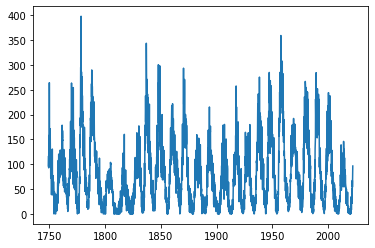

In [6]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.plot(sunspots[:, 2], sunspots[:, 3])  # Numpy syntax to access all
# rows, specified column.

The plot command accepted an array of 'X' values and an array of 'Y' values. We used a special NumPy ":" syntax,
which we'll learn more about later. Don't worry about the %matplotlib magic command for now - we'll also look at this later.

## Naming Columns

I happen to know that the columns here are defined as follows:

From http://www.sidc.be/silso/infosnmtot:

> CSV

> Filename: SN_m_tot_V2.0.csv
> Format: Comma Separated values (adapted for import in spreadsheets)
The separator is the semicolon ';'.

> Contents:
* Column 1-2: Gregorian calendar date
- Year
- Month
* Column 3: Date in fraction of year.
* Column 4: Monthly mean total sunspot number.
* Column 5: Monthly mean standard deviation of the input sunspot numbers.
* Column 6: Number of observations used to compute the monthly mean total sunspot number.
* Column 7: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

I can actually specify this to the formatter:

In [7]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)

sunspots = np.genfromtxt(
    spots.raw,
    delimiter=";",
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
)

In [8]:
sunspots

array([(1749., 1., 1749.042,  96.7, -1. , -1.000e+00, 1.),
       (1749., 2., 1749.123, 104.3, -1. , -1.000e+00, 1.),
       (1749., 3., 1749.204, 116.7, -1. , -1.000e+00, 1.), ...,
       (2022., 3., 2022.204,  78.5, 13.9,  1.277e+03, 0.),
       (2022., 4., 2022.286,  84.1, 15.2,  1.237e+03, 0.),
       (2022., 5., 2022.371,  96.5, 16. ,  1.250e+03, 0.)],
      dtype=[('year', '<f8'), ('month', '<f8'), ('date', '<f8'), ('mean', '<f8'), ('deviation', '<f8'), ('observations', '<f8'), ('definitive', '<f8')])

## Typed Fields

It's also often good to specify the datatype of each field.

In [9]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)

sunspots = np.genfromtxt(
    spots.raw,
    delimiter=";",
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
    dtype=[int, int, float, float, float, int, int],
)

In [10]:
sunspots

array([(1749, 1, 1749.042,  96.7, -1. ,   -1, 1),
       (1749, 2, 1749.123, 104.3, -1. ,   -1, 1),
       (1749, 3, 1749.204, 116.7, -1. ,   -1, 1), ...,
       (2022, 3, 2022.204,  78.5, 13.9, 1277, 0),
       (2022, 4, 2022.286,  84.1, 15.2, 1237, 0),
       (2022, 5, 2022.371,  96.5, 16. , 1250, 0)],
      dtype=[('year', '<i8'), ('month', '<i8'), ('date', '<f8'), ('mean', '<f8'), ('deviation', '<f8'), ('observations', '<i8'), ('definitive', '<i8')])

Now, NumPy understands the names of the columns, so our plot command is more readable:

In [11]:
sunspots["year"]

array([1749, 1749, 1749, ..., 2022, 2022, 2022])

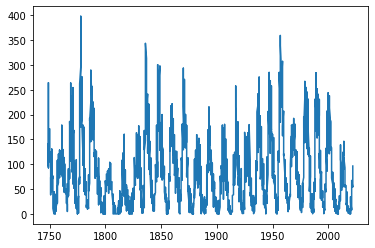

In [12]:
plt.plot(sunspots["year"], sunspots["mean"])